# 로지스틱 회귀분류 모델
##### 회귀 : 1차, 2차 방정식 

In [1]:
import pandas as pd 
fish = pd.read_csv('./data/05_생선_분류_데이터셋.csv')
fish.head()

# Species	Weight	Length	Diagonal	Height	Width
# 종류       무게    길이   대각선       높이   두께

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
## 종류 특성의 고유한 값 조회하기 
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
# KNN 모델 : 독립변수 1, 종속변수 1, 범주 2 

In [4]:
### 독립변수 추출하기 ( 2차원 )
# - 변수명은 fish_input
# - sklearn훈련에 사용하는 형태로 만들기
import numpy as np

# 데이터 프레임을 2차원으로 변환 
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_input

# 상위 다섯개 추출하기
fish_input[0:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [5]:
# 종속변수 만들기 (1차원)
# - 변수명 : fish_target
fish_target = fish['Species'].to_numpy()
fish_target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [87]:
# 훈련데이터와 테스트데이터 나누기

# 사용 패키지 불러들이기
from sklearn.model_selection import train_test_split
train_input, test_input,train_target,test_target = train_test_split(fish_input,fish_target,random_state=42)

print(fish_input.shape)
print(fish_target.shape)
print(test_input.shape)
print(test_target.shape)

(159, 5)
(159,)
(40, 5)
(40,)


In [7]:
### 정규화(표준화)  : 스케일 표준화
# - 변수 : train_scaled, test_scaled

# 라이브러리 생성 
from sklearn.preprocessing import StandardScaler

# 클래스 모델 생성
ss = StandardScaler()

# 스스로 표준점수 생성 
ss.fit(train_input)

## 훈련데이터 표준점수로 변환하기
train_scaled = ss.transform(train_input)

### 테스트 데이터를 표준점수로 변환하기
test_scaled = ss.transform(test_input)

# 샘플 5개 행 출력해보기
train_scaled[:5]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [ 0.30041219,  1.54653445,  1.45316551, -0.46981663,  0.27291745],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471],
       [-0.71289885, -0.73062511, -0.70092664, -0.0802298 , -0.7033869 ]])

In [8]:
### k-최근접이웃분류 모델로 테스트
### Classifier : 분류모델  Regressor : 회귀모델 
# - 이웃 3개 n_neighbors=3
from sklearn.neighbors import KNeighborsClassifier

### 클래스(모델) 이름 :KNeighborsRegressor()
kn = KNeighborsClassifier()
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))


0.8907563025210085
0.85


C:\Users\82102\ml\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\82102\ml\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or 

In [9]:
# 상위 5개 예측하기
print(kn.predict(test_scaled[:5]))
print(test_target[:5])

# [[실제값 , 예측값 ],[실제값, 예측값]...]
import numpy as np

np.column_stack((test_target[:5], kn.predict(test_scaled[:5])))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch']


C:\Users\82102\ml\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\82102\ml\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or 

array([['Perch', 'Perch'],
       ['Smelt', 'Smelt'],
       ['Pike', 'Pike'],
       ['Whitefish', 'Perch'],
       ['Perch', 'Perch']], dtype=object)

In [10]:
## 각행의 범주들의 확률값 확인
# - 확률값의 범위 : 0~1 (0%~100%)
# - 확률값 조회 함수 : predict_proba(테스트데이터)
# - sklearn 분류모델 공통으로 사용 

proba = kn.predict_proba(test_scaled[:5])
np.round(proba, decimals=4)

# 훈련모델의 범주의 순서 
#     ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
#array( [[0.   , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
#       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
#       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
#       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
#       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])


# 첫번째 예측값의 결과는 perch
# 두번째 예측값의 결과는 smelt
# 세번째 예측값의 결과는 pike
# 네번째 예측값의 결과는 perch와 roach 가 67%, 33% 확률로 결과값이 나온다
# 다섯번째 예측값의 결과는 perch와 roach 가 67%, 33% 확률로 결과값이 나온다

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [11]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [12]:
### 훈련모델이 가지고 있는 범주의 리스트값 확인
## 종속변수 범주의 항목을 의미 
## 데이터가 가진 범주와 훈련모델이 가지고있는 순서 다르다
## 훈련모델은 범주를 오름차순으로 정렬후 가지고있다 
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [13]:
## 5개의 데이터의 이웃들 확인하기
# - 각 행마다 이웃이 3개씩
# - 이웃의 갯수 많아지면 복잡도 감소 
distance, indexes = kn.kneighbors(test_scaled[:5])
print(indexes)

for test_data in test_scaled[:5]:
    distance, indexes = kn.kneighbors([test_data])
    print(train_target[indexes])
print('-------------------------------')


print(train_target[indexes])

[[ 39  64  63]
 [ 93  99  43]
 [100 105  27]
 [104 115 106]
 [ 72  26  68]]
[['Perch' 'Perch' 'Perch']]
[['Smelt' 'Smelt' 'Smelt']]
[['Pike' 'Pike' 'Pike']]
[['Roach' 'Perch' 'Perch']]
[['Perch' 'Perch' 'Roach']]
-------------------------------
[['Perch' 'Perch' 'Roach']]


# 로지스틱 회귀분류(Logistic Regression)

#### 선형방정식 사용 : 다중회귀 방정식과 동일
####  z = a* x1 + b*x2 + .... + y절편
#### - z 값 구하는 함수  : decision_function(훈련데이터)
#### - z 값의 범위: 0보다 작거나 크거나 
#### 확률 : 0 ~ 1 사이값을 사용 (0%~100%)
#### - 따라서 z 값은 확률의 0~1사이의 값으로 변환하는 작업이 필요
 - 이때 사용하는 방법
: 시그모이드 방식(이진분류방식), 소프트맥스 방식(다중분류방식) :  ( 모두 함수 지원됨 )

## 로지스틱 회귀로 이진분류
#### - 시그모이드 함수 사용 
####  ( 이진분류 방식은 2개의 범주만 사용가능)

In [14]:
train_scaled
train_target

array(['Bream', 'Pike', 'Smelt', 'Perch', 'Parkki', 'Roach', 'Perch',
       'Bream', 'Perch', 'Perch', 'Perch', 'Bream', 'Perch', 'Parkki',
       'Perch', 'Bream', 'Smelt', 'Perch', 'Roach', 'Bream', 'Pike',
       'Bream', 'Pike', 'Perch', 'Parkki', 'Bream', 'Perch', 'Pike',
       'Bream', 'Perch', 'Parkki', 'Roach', 'Perch', 'Bream', 'Roach',
       'Perch', 'Bream', 'Bream', 'Perch', 'Perch', 'Roach', 'Pike',
       'Perch', 'Smelt', 'Pike', 'Roach', 'Perch', 'Parkki', 'Perch',
       'Bream', 'Perch', 'Smelt', 'Perch', 'Parkki', 'Smelt', 'Perch',
       'Perch', 'Roach', 'Bream', 'Perch', 'Perch', 'Roach', 'Roach',
       'Perch', 'Perch', 'Bream', 'Roach', 'Bream', 'Roach', 'Parkki',
       'Perch', 'Perch', 'Perch', 'Perch', 'Pike', 'Pike', 'Perch',
       'Bream', 'Perch', 'Bream', 'Whitefish', 'Pike', 'Bream', 'Bream',
       'Roach', 'Perch', 'Pike', 'Bream', 'Pike', 'Parkki', 'Roach',
       'Perch', 'Roach', 'Smelt', 'Whitefish', 'Roach', 'Perch', 'Bream',
       'Whitefi

In [44]:
### 이진분류 방식은 2개의 범주만 사용가능합니다
# - 기존 데이터에서 2개 (Bream과 Smelt) 범주만 추출하여 사용
# 독립변수명 : train_bream_smelt
# 종속변수명 : target_bream_smelt

train_bream_smelt =[]
target_bream_smelt =[]
for i in range (len(train_target)):
    if train_target[i] == 'Bream' or train_target[i] == 'Smelt':
        train_bream_smelt.append(train_scaled[i])
        target_bream_smelt.append(train_target[i])
    else:
        pass

train_bream_smelt = np.array(train_bream_smelt)
target_bream_smelt = np.array(target_bream_smelt)

print(train_bream_smelt.shape)
print(target_bream_smelt.shape)


(33, 5)
(33,)


In [42]:
train_bream_smelt = train_scaled[(train_target=='Bream') | (train_target=='Smelt')]
train_bream_smelt.shape

(33, 5)

In [46]:
target_bream_smelt = train_target[(train_target=='Bream') | (train_target=='Smelt')]
target_bream_smelt.shape

(33,)

In [47]:
## 이진분류 하기
## 사용할 패키지 불러 들이기 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(train_bream_smelt,target_bream_smelt)
lr.score(train_bream_smelt,target_bream_smelt)


1.0

In [48]:
## 예측 상위 5개
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [53]:
## 각각의 확률 조회 
print(lr.predict_proba(train_bream_smelt[:5]))

## 범주별 확률 조회
#       ['Bream'       'Smelt']
#     [[0.99759855 0.00240145]
#      [0.02735183 0.97264817]
#      [0.99486072 0.00513928]
#      [0.98584202 0.01415798]
#      [0.99767269 0.00232731]]


[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [54]:
print(lr.classes_)

['Bream' 'Smelt']


In [55]:
# 계수 ( 또는 가중치) 및 y 절편값 조회하기
# 사용된 계수 : coef_  y절편 : intercept_

print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
# 방정식
# -0.4037798*Diagonal+(-0.57620209*Height)+(-0.66280298*Length)+
    (-1.01290277*Weight)+(-0.73168947*Width) -2.16155132

In [88]:
# 이진분류에서 z 값 ( 선형방정식의 결과값들)을 0~1로 변환
# z 값 조회하기 
# 여기서 구한 z 값이 아래 시그모이드 함수 그래프에 z 값이다 z 값에 따른 y 값이 확률
# 그래프가 0을 기준으로 음수면 50%이하 , 양수면 50% 이상 확률 
# expit(decisions) 값이 확률값 시그모이드 그래프에서 y 값 
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)
print('-------------------------------------------------------------------')

## 시그모이드 함수 : scipy 패키지의 expit()
# 확률 
# 왼쪽인덱스(0) :음수 , 오른쪽인덱스(1): 양수 
#       ['Bream'       'Smelt']
#     [[0.99759855 0.00240145*]
#      [0.02735183 0.97264817*]
#      [0.99486072 0.00513928*]
#      [0.98584202 0.01415798*]
#      [0.99767269 0.00232731*]]
# 왼쪽인덱스(양수) 값들이 exipit 사용시 추출되는 값 
from scipy.special import expit
print(expit(decisions))

[[ 13.07725394   5.67942253  -3.35342016  -3.31345866   2.17369154
  -20.94262085   6.67913166]
 [-11.87102251   2.30251194   5.38261668  -3.16149417   3.19000759
    8.30347116  -4.1460907 ]
 [ 12.33862972   5.65081112  -4.66940509  -2.1462275    1.70364657
  -17.38226266   4.50480785]
 [ 10.54151592   6.1097114   -4.81187015  -2.96240308   2.29034183
  -14.96405353   3.79675761]
 [ 13.67853192   5.73153986  -4.25491951  -2.5508803    1.73530999
  -20.2483173    5.90873535]]
-------------------------------------------------------------------
[[9.99997908e-01 9.96596096e-01 3.37833449e-02 3.51123532e-02
  8.97862000e-01 8.03036577e-10 9.98744709e-01]
 [6.99000352e-06 9.09084864e-01 9.95425244e-01 4.06407574e-02
  9.60456509e-01 9.99752406e-01 1.55795997e-02]
 [9.99995621e-01 9.96497645e-01 9.29071989e-03 1.04684275e-01
  8.46010398e-01 2.82474489e-08 9.89065178e-01]
 [9.99973584e-01 9.97783731e-01 8.06703002e-03 4.91535705e-02
  9.08073989e-01 3.17098355e-07 9.78049226e-01]
 [9.9999885

## <시그모이드 함수(sigmoid function) 또는 로지스틱함수>
#### - 이진 분류라고 합니다 (이진분류 : 범주 2개)
#### - 범주가 2개일때 주로 사용

#### - 사용패키지 : from scipy.special
#### - 사용모둘 : import expit
#### - 사용함수 : expit(z값)

####   0/1. Y/N 처럼 둘중 하나로 분류할 때
####  ( 기존에 KNN에서 사용했었다)
####  - 시그모이드 값의 범위 : 0과 1 사잇값 ( 0%~ 100%)
####  - 범주들의 z 값을 기준으로 0과 1의 사잇값으로 변환하여 반환한다
####  - 변환공식 : 1/(1+np.exp^(-z))
####    : np.exp : 지수값으로 변화하는 함수 (0-1)
####   : -z : z 값은 음수 사용
####   : z = 0 일때, 확률은 0.5(50%)
####   : z > 0 일때, 확률 > 0.5(51%이상) ---> 예측확률이 높다
####   : z < 0 일때, 확률은 <0.5(49프로 미만) 
####  - 여러개 범주들 중에 확률이 가장 높은 범주 선택 

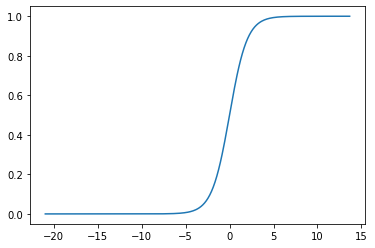

In [90]:
## 시그모이드 함수 예시
import numpy as np
import matplotlib.pyplot as plt

### 임의의 z 값
### decision의 min, max 값을 범위로 그린다 
z = np.arange(decisions.min(),decisions.max(),0.1)

### 시그모이드 공식 사용
# - np.exp() : 0-1지수로 변환하기
#            : z값의 스케일을 통일 시키기 위해서 z 값은 음수로 처리 (제곱승 시에 분모로 계산)
#            : 2^(-2) = 1(2^2),2^0 = 1
phi = 1/(1+np.exp(-z))

plt.plot(z,phi)
plt.show()
# y 축 확률
# z = 0 > y=0.5(50%)


## 다중분류
##### - 다중분류는 모든 범주를 사용합니다
##### - 독립변수도 모든 특성을 사용합니다
##### - 모든 특성을 사용하다 보니 복잡도에 대한 부분을 고려해야 합니다
#####  (너무 복잡해도 안되고, 느슨해도 안되고 적당히)
##### - 사용하는 클래스 : 이진분류와 동일
##### - 복잡도를 강약으로 조절하기 위해 규제강도 조절값 사용
##### - 규제강도 조절값 속성명 : C (대문자), 기존의 alpha와 같음
##### - 훈련반복횟수 사용
##### : 훈련모델은 정확도를 높이기 위해 일반적으로 반복 수행을 합니다
##### : 기본 반복횟수 : 100회
##### : 훈련 중에 100회보다 더 해야하는 경우 경고 창이 뜨는 경우가 있음 
##### : 독립변수의 특성이 많을 수록 훈련반복횟수가 늘어나는 경우 발생 
##### : 반복횟수 속성값: max_iter
##### : 보통 반복횟수를 1000으로 놓고 진행하는 경우가 많음
##### - 이외 모든 훈련함수는 기존과 동일 

In [63]:
### 규제강도 = 20
### 반복횟수 = 1000회
### 훈련데이터와 테스트데이터에 대한 정확도 확인 

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))


0.9327731092436975
0.925


In [71]:
# 상위 5건으로 예측 진행
print(lr.predict(test_scaled[:5]))
# 전체 범주별 확률 확인 
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))
print(lr.classes_)

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [79]:
# 사용된 계수 출력
print(lr.coef_)
print('----------------------------------------------------------------------')
print(lr.intercept_)

[[-1.49001669 -1.02911188  2.59344182  7.70358216 -1.20070535]
 [ 0.19618154 -2.01070049 -3.77975316  6.50491991 -1.99481795]
 [ 3.56280088  6.34356158 -8.48970479 -5.75757495  3.79306719]
 [-0.10458248  3.60320123  3.93067908 -3.61738454 -1.75069682]
 [-1.40061602 -6.07502954  5.2596964  -0.87219392  1.86043801]
 [-1.38526513  1.49213827  1.39225555 -5.67734539 -4.40097836]
 [ 0.62149789 -2.32405917 -0.90661489  1.71599673  3.69369327]]
----------------------------------------------------------------------
[-0.09205102 -0.26290669  3.25101219 -0.14742096  2.65498547 -6.78784574
  1.38422676]


In [81]:
decisions = lr.decision_function(test_scaled[:5])
print(decisions)

[[ -6.49811219   1.03222359   5.16363084  -2.72864981   3.33886449
    0.32652617  -0.63448309]
 [-10.85948553   1.92716781   4.77101627  -2.39845749   2.97807376
    7.84136341  -4.25967822]
 [ -4.33529078  -6.23308584   3.17445769   6.48673486   2.35757909
    2.42115468  -3.87154969]
 [ -0.68336508   0.4527285    2.64700205  -1.18666466   3.26454111
   -5.75276345   1.25852152]
 [ -6.39707808  -1.99274742   5.81574323  -0.11032399   3.50282236
   -0.11162157  -0.70679453]]


In [85]:
## 소프트 맥스(softmax)
# 사용하는 패키지 : scipy.special
# 사용하는 모듈 : softmax

from scipy.special import softmax

# decisions : z 값 
# 0~1 사이의 값으로 변환 해준다 
proba = softmax(decisions, axis=1)
print(np.round(proba , decimals=3))


# print(np.round(proba, decimals=3)) 값과 동일하다 ( 이진분류는 동일하지 않음 )

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


## 범주의 갯수에 따라 자동으로 판별하여 결정하고 사용
### *이진분류 시그모이드
### *다중분류 소프트맥스